  


# p==TP/TP+FP
# R==TP/TP+FN








  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier



In [2]:
dataset = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
dataset['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [4]:
dataset=dataset.drop_duplicates()

In [5]:
dataset.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
dataset=dataset.drop_duplicates()

In [7]:
# x_data = dataset.drop('Diabetes_012', axis = 'columns')

In [8]:
dataset

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [9]:
for col in dataset.columns:
    dataset[col] = dataset[col].replace({'No': 0, 'Yes': 1})

In [10]:
dataset

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [11]:
dataset.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [12]:
missing_values=dataset.isnull().sum() # missing values

percent_missing = dataset.isnull().sum()/dataset.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Diabetes_012,0,0.0
HighBP,0,0.0
HighChol,0,0.0
CholCheck,0,0.0
BMI,0,0.0
Smoker,0,0.0
Stroke,0,0.0
HeartDiseaseorAttack,0,0.0
PhysActivity,0,0.0
Fruits,0,0.0


In [13]:
dataset.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [14]:
# sns.countplot(x='class', hue='sudden weight loss', data=dataset)

In [15]:

# sns.countplot(x='class', hue='weakness', data=dataset)

In [16]:
# sns.countplot(x='class', hue='Obesity', data=dataset)

In [17]:
# sns.countplot(x='class', hue='Age', data=dataset)

In [18]:
# sns.countplot(x='class', hue='Gender', data=dataset)

In [19]:
# sns.countplot(x='class', hue='Polyuria', data=dataset)

In [20]:
# dataset.hist(figsize=(20,15));

In [21]:
# plt.figure(figsize=(25,20))
# sns.heatmap(dataset.corr(), annot=True, cmap="PuRd")

In [22]:
# g = sns.PairGrid(dataset)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)

In [23]:
# plt.bar(dataset['class'], dataset['Age']);

In [24]:
# sns.pairplot(dataset, hue='class')
# plt.show()

In [25]:
dataset.drop('Income', inplace=True, axis=1)


In [26]:
dataset.drop('Education', inplace=True, axis=1)


In [27]:
dataset.drop('MentHlth', inplace=True, axis=1)


In [28]:
dataset.drop('PhysHlth', inplace=True, axis=1)
dataset.drop('GenHlth', inplace=True, axis=1)



In [29]:
target = dataset['Diabetes_012']

In [30]:
dataset.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',
       'Age'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset.drop('Diabetes_012',axis = 1))
scaled_features = scaler.transform(dataset.drop('Diabetes_012',axis = 1))
x_data = pd.DataFrame(scaled_features,columns = dataset.columns[:-1])
# x_data=dataset.drop(['Diabetes_012'],axis=1)
y_data = target


In [32]:
# x_data = dataset.iloc[:, :-1]
# y_data = dataset.iloc[:, -1]

In [33]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_data, y_data = smote.fit_resample(x_data, y_data)
ros = RandomUnderSampler(random_state=42, replacement=True,sampling_strategy={ 0.0:35000 , 2.0:35000})
x_data, y_data = ros.fit_resample(x_data, y_data)
# from sklearn.utils import resample
# df_minority_upsampled = resample(dataset["Diabetes_012"], 
#                                  replace=False,     # sample with replacement
#                                  n_samples=35184,    # to match majority class
#                                  random_state=123)
# dataset=dataset.resample (n_samples=35184)

In [34]:
y_data.value_counts()

Diabetes_012
0.0    35000
2.0    35000
1.0     4629
Name: count, dtype: int64

In [35]:
y_data.value_counts()

Diabetes_012
0.0    35000
2.0    35000
1.0     4629
Name: count, dtype: int64

In [36]:
y_data

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
74624    2.0
74625    2.0
74626    2.0
74627    2.0
74628    2.0
Name: Diabetes_012, Length: 74629, dtype: float64

<Axes: >

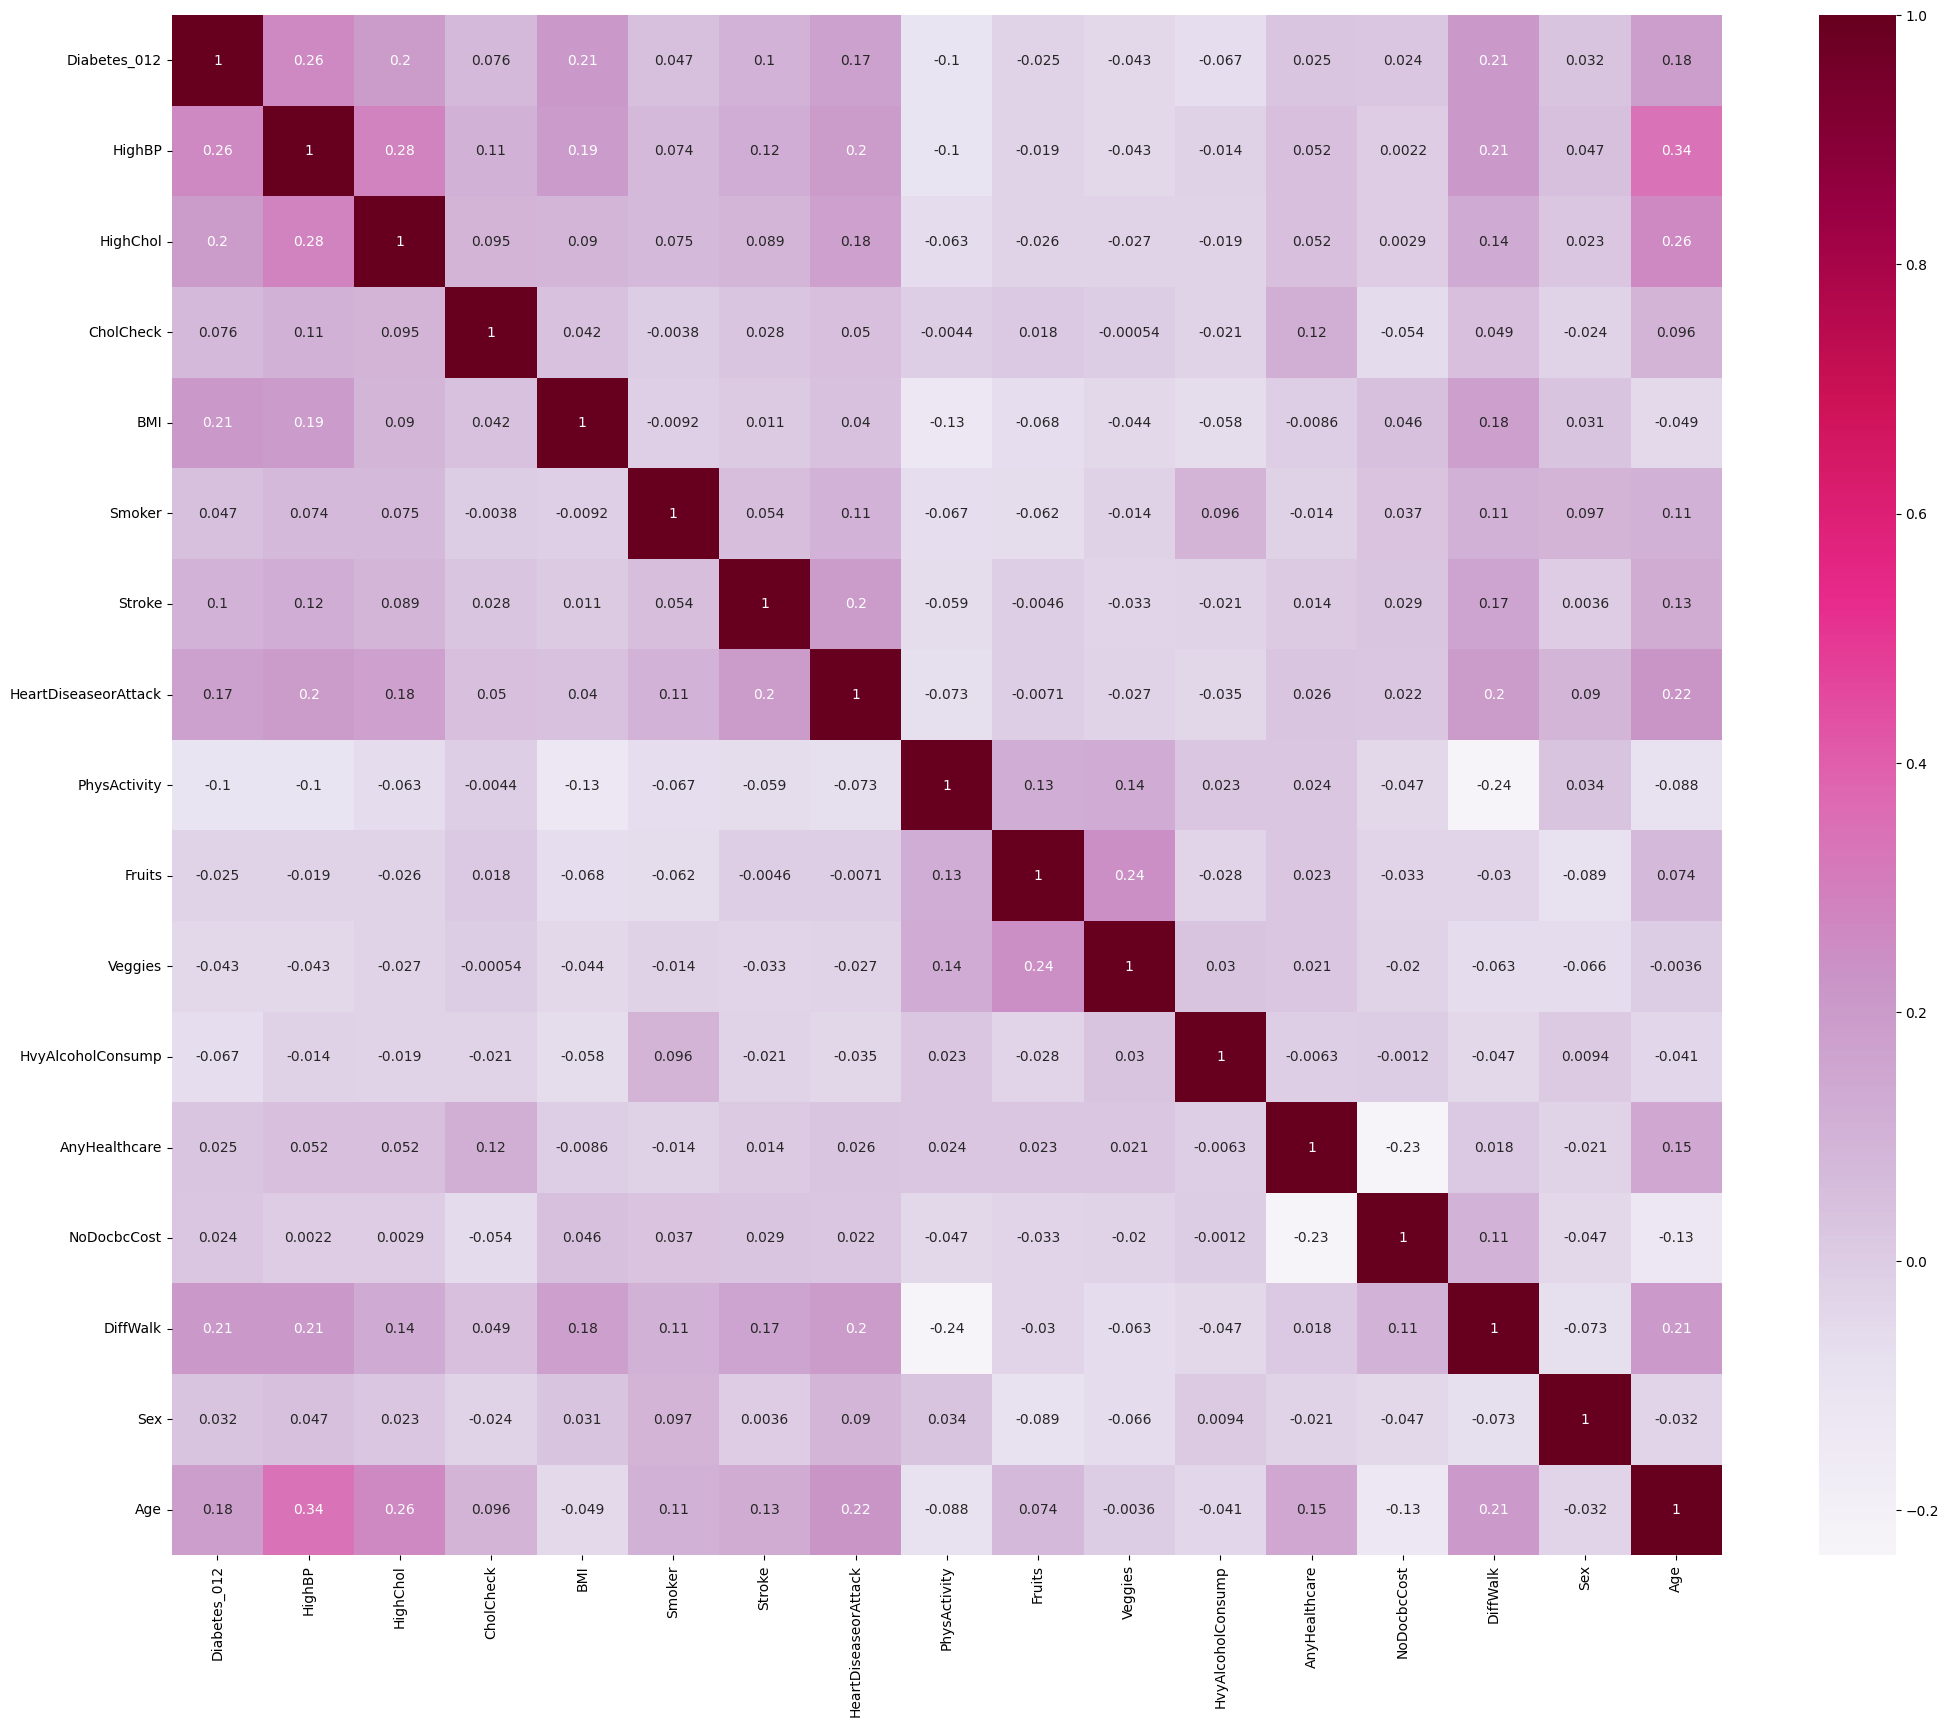

In [37]:
plt.figure(figsize=(25,20))
sns.heatmap(dataset.corr(), annot=True, cmap="PuRd")

In [38]:
# By using this function we can select correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
col_corr = corr_features = correlation(x_data, 0.8)
print(col_corr)

set()


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x_data, y_data, test_size=0.3, random_state=20,stratify=y_data)

# KNN


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_data,y_train_data)
    pred_i = knn.predict(x_test_data)
    error_rate.append(np.mean(pred_i != y_test_data))
    print(i,np.mean(pred_i != y_test_data))
    

1 0.3475814015811336
2 0.38014203403457053
3 0.3405243646433517
4 0.34901067488498816
5 0.3438295591585153
6 0.33650453347626064
7 0.3333333333333333
8 0.3320827191924606
9 0.3317700656572424
10 0.3326633614721515
11 0.33235070793693333
12 0.3319933896109697
13 0.332127383983206
14 0.33060878109786057
15 0.330653445888606
16 0.32873285988655143
17 0.3277948992808969
18 0.32752691053642413
19 0.32515967662691503
20 0.32618696681406045
21 0.32667827951226047
22 0.32641029076778777
23 0.3274822457456787
24 0.3264549555585332
25 0.32739291616418775
26 0.32574031890660593
27 0.3270802626289696
28 0.32533833578989685
29 0.32721425700120593
30 0.3271695922104605
31 0.3276609049086605
32 0.32815221760686053
33 0.32730358658269687
34 0.32605297244182413
35 0.32730358658269687
36 0.3274822457456787
37 0.32694626825673323
38 0.32641029076778777
39 0.32712492741971505


Text(0, 0.5, 'Error Rate')

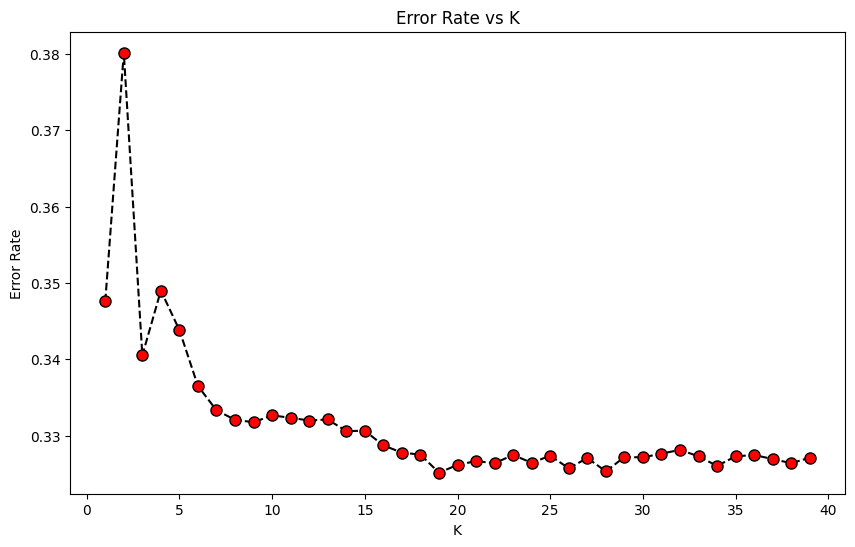

In [43]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [44]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(x_train_data, y_train_data)
y_predict_train = knn.predict(x_train_data)
s=accuracy_score(y_train_data, y_predict_train)
print(s)

0.6943147013782542


In [45]:
y_predict_test = knn.predict(x_test_data)
acc_score = accuracy_score(y_test_data, y_predict_test)
print (acc_score)


0.6726964134173031


>2, train: 0.796, test: 0.620,i 2.000 
>3, train: 0.784, test: 0.659,i 3.000 
>4, train: 0.761, test: 0.651,i 4.000 
>5, train: 0.750, test: 0.656,i 5.000 
>6, train: 0.740, test: 0.663,i 6.000 
>7, train: 0.734, test: 0.667,i 7.000 
>8, train: 0.727, test: 0.668,i 8.000 
>9, train: 0.724, test: 0.668,i 9.000 
>10, train: 0.719, test: 0.667,i 10.000 
>11, train: 0.718, test: 0.668,i 11.000 
>12, train: 0.714, test: 0.668,i 12.000 
>13, train: 0.712, test: 0.668,i 13.000 
>14, train: 0.710, test: 0.669,i 14.000 
>15, train: 0.707, test: 0.669,i 15.000 
>16, train: 0.707, test: 0.671,i 16.000 
>17, train: 0.705, test: 0.672,i 17.000 
>18, train: 0.705, test: 0.672,i 18.000 
>19, train: 0.704, test: 0.675,i 19.000 
>20, train: 0.703, test: 0.674,i 20.000 
>21, train: 0.702, test: 0.673,i 21.000 
>22, train: 0.700, test: 0.674,i 22.000 
>23, train: 0.700, test: 0.673,i 23.000 
>24, train: 0.699, test: 0.674,i 24.000 
>25, train: 0.698, test: 0.673,i 25.000 
>26, train: 0.698, test: 0.674,i

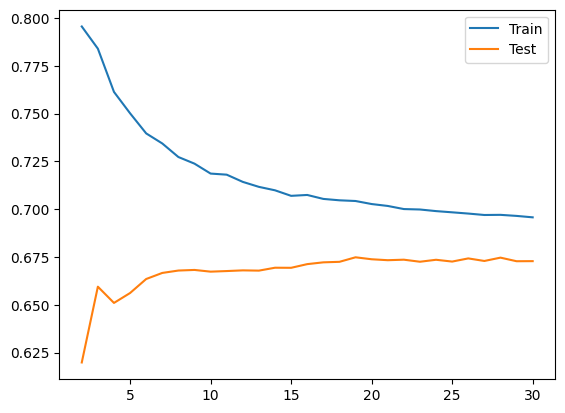

In [46]:
train_scores, test_scores = list(), list()
values = [i for i in range(2, 31)]

for i in values:
	
	modell = KNeighborsClassifier( n_neighbors=i)
	modell.fit(x_train_data, y_train_data)

	train_yhat = modell.predict(x_train_data)
	train_acc = accuracy_score(y_train_data, train_yhat)
	train_scores.append(train_acc)
	
	test_yhat = modell.predict(x_test_data)
	test_acc = accuracy_score(y_test_data, test_yhat)
	test_scores.append(test_acc)
	
	print('>%d, train: %.3f, test: %.3f,i %.3f ' % (i, train_acc, test_acc,i))
	
 
plt.plot(values, train_scores,  label='Train')
plt.plot(values, test_scores,  label='Test')
plt.legend()
plt.show()

In [47]:
KNN= KNeighborsClassifier(n_neighbors=15)
# param_grid = {'n_neighbors' : np.arange(1,50,2)}
# KNN_model = GridSearchCV(KNN, param_grid, cv=10)

In [48]:
KNN_Classifier = KNN.fit(x_train_data, y_train_data)

In [49]:
KNN_predictions = KNN_Classifier.predict(x_test_data)

In [50]:
from sklearn.metrics import classification_report


print(classification_report(y_test_data, KNN_predictions))

              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69     10500
         1.0       0.00      0.00      0.00      1389
         2.0       0.66      0.74      0.69     10500

    accuracy                           0.67     22389
   macro avg       0.45      0.48      0.46     22389
weighted avg       0.63      0.67      0.65     22389



In [51]:
print("Accuracy of  data:", accuracy_score( y_test_data,KNN_predictions))

Accuracy of  data: 0.669346554111394


# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

>1, train: 0.807, test: 0.638
>2, train: 0.819, test: 0.640
>3, train: 0.852, test: 0.673
>4, train: 0.859, test: 0.669
>5, train: 0.870, test: 0.678
>6, train: 0.873, test: 0.681
>7, train: 0.877, test: 0.682
>8, train: 0.879, test: 0.688
>9, train: 0.881, test: 0.688
>10, train: 0.884, test: 0.690
>11, train: 0.884, test: 0.693
>12, train: 0.886, test: 0.689
>13, train: 0.886, test: 0.694
>14, train: 0.888, test: 0.690
>15, train: 0.888, test: 0.693
>16, train: 0.888, test: 0.692
>17, train: 0.890, test: 0.696
>18, train: 0.890, test: 0.695
>19, train: 0.890, test: 0.695
>20, train: 0.891, test: 0.695
>21, train: 0.891, test: 0.692
>22, train: 0.891, test: 0.695
>23, train: 0.891, test: 0.696
>24, train: 0.892, test: 0.696
>25, train: 0.892, test: 0.696
>26, train: 0.892, test: 0.694
>27, train: 0.892, test: 0.695
>28, train: 0.892, test: 0.696
>29, train: 0.892, test: 0.697
>30, train: 0.892, test: 0.693
>31, train: 0.893, test: 0.697
>32, train: 0.893, test: 0.696
>33, train: 0.893

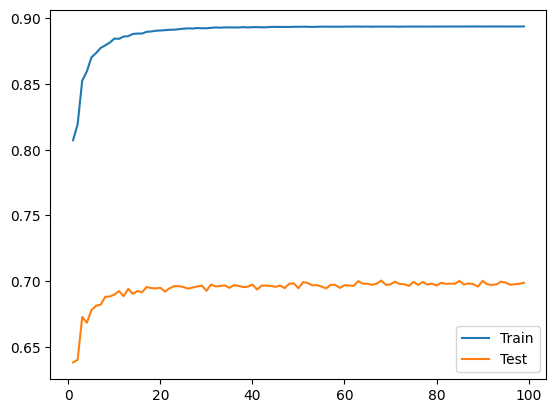

In [53]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 100)]

for i in values:

	model = RandomForestClassifier(n_estimators=i)
	
	model.fit(x_train_data, y_train_data)
	# evaluate on the train dataset
	train_yhat = model.predict(x_train_data)
	train_acc = accuracy_score(y_train_data, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(x_test_data)
	test_acc = accuracy_score(y_test_data, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores,  label='Train')
plt.plot(values, test_scores,  label='Test')
plt.legend()
plt.show()

In [54]:
rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': np.arange(1,40),
    'max_depth' :np.arange(2,10),
    'criterion' :['gini', 'entropy']
}
RF_model=GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3,return_train_score=True,verbose=3)
RF_Classifier = RF_model.fit(x_train_data, y_train_data) 

Fitting 3 folds for each of 624 candidates, totalling 1872 fits
[CV 1/3] END criterion=gini, max_depth=2, n_estimators=1;, score=(train=0.640, test=0.640) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, n_estimators=1;, score=(train=0.643, test=0.635) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, n_estimators=1;, score=(train=0.596, test=0.602) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, n_estimators=2;, score=(train=0.622, test=0.617) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, n_estimators=2;, score=(train=0.634, test=0.628) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, n_estimators=2;, score=(train=0.647, test=0.651) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, n_estimators=3;, score=(train=0.648, test=0.647) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, n_estimators=3;, score=(train=0.661, test=0.657) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, n_estimators=3

In [55]:
RF_Classifier

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             return_train_score=True, verbose=3)

In [56]:
RF_predictions = RF_Classifier.predict(x_test_data)

In [57]:
print(classification_report(y_test_data, RF_predictions))

              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70     10500
         1.0       0.00      0.00      0.00      1389
         2.0       0.67      0.76      0.71     10500

    accuracy                           0.68     22389
   macro avg       0.46      0.49      0.47     22389
weighted avg       0.64      0.68      0.66     22389



c:\Users\hemoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hemoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hemoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [58]:
print("Accuracy of unscaled data:", accuracy_score(y_test_data, RF_predictions))

Accuracy of unscaled data: 0.6834159631962125


# Neural Network

In [59]:
from sklearn.neural_network import MLPClassifier

In [60]:
NN_model = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

In [61]:
NN_Classifier = NN_model.fit(x_train_data, y_train_data)

In [62]:
NN_Classifier

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [63]:
NN_predictions = NN_Classifier.predict(x_test_data)

In [64]:
NN_train = NN_Classifier.predict(x_train_data)

In [65]:
print("Accuracy of train data:", accuracy_score(y_train_data, NN_train))

Accuracy of train data: 0.6876722817764166


In [66]:
print(classification_report(y_test_data, NN_predictions))

              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70     10500
         1.0       0.00      0.00      0.00      1389
         2.0       0.66      0.75      0.71     10500

    accuracy                           0.68     22389
   macro avg       0.45      0.48      0.47     22389
weighted avg       0.64      0.68      0.66     22389



c:\Users\hemoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hemoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hemoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [67]:
print("Accuracy data:", accuracy_score(y_test_data, NN_predictions))

Accuracy data: 0.680825405332976


### Decision tree 

In [68]:
from sklearn.tree import DecisionTreeClassifier


classifier = DecisionTreeClassifier( splitter='best')
param_grid = { 
    'max_leaf_nodes': [5, 20],
    'max_depth' : [3,10],
    }
RF_model=GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
RF_Classifier = RF_model.fit(x_train_data, y_train_data) 

In [69]:
DT_predictions = RF_model.predict(x_test_data)
DT_train = RF_model.predict(x_train_data)

In [70]:
print("Accuracy of unscaled data:", accuracy_score(y_train_data, DT_train))

Accuracy of unscaled data: 0.6723392036753446


In [71]:
print("Accuracy of unscaled data:", accuracy_score(y_test_data, DT_predictions))

Accuracy of unscaled data: 0.6648800750368484


In [72]:
dataset.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',
       'Age'],
      dtype='object')

 # ensamble

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier


In [74]:
log = LogisticRegression()
rnd = RandomForestClassifier(n_estimators=100)
svm = SVC()

In [75]:
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('random_forest', rnd), ('support_vector_machine', svm)],
    voting='hard',weights=[1,3,1])


In [76]:
voting.fit(x_train_data, y_train_data)

In [ ]:
for clf in (log, rnd, svm, voting):
    clf.fit(x_train_data, y_train_data)
    y_pred = clf.predict(x_test_data)
    print(clf.__class__.__name__, accuracy_score(y_test_data, y_pred))

LogisticRegression 0.5494721774915011
RandomForestClassifier 0.5122562175702272
SVC 0.5432098765432098
VotingClassifier 0.5145822150653069


# LogisticRegression

In [ ]:
LogisticRegressionModel = LogisticRegression(solver='sag',C=1.0,random_state=33,max_iter=10000)

LogisticRegressionModel_1=LogisticRegressionModel.fit(x_train_data, y_train_data)

In [ ]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel_1.score(x_train_data, y_train_data))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel_1.score(x_test_data, y_test_data))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel_1.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel_1.n_iter_)
print('----------------------------------------------------')


LogisticRegressionModel Train Score is :  0.5457822085889571
LogisticRegressionModel Test Score is :  0.5494721774915011
LogisticRegressionModel Classes are :  [0. 1. 2.]
LogisticRegressionModel No. of iteratios is :  [34]
----------------------------------------------------


## SVC

In [ ]:
mrange = list(np.arange(0.5, 10.5, 0.5))
mrange.append(0.1)
mrange.sort()
mrange = np.array(mrange)
mrange


array([ 0.1,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [ ]:

# mrange = np.arange(0,10.5,.5)
param_grid = {'C': mrange,
              # 'gamma': mrange,
            #   'degree': np.arange(1,6),
              # 'kernel': ['poly','linear','sigmoid','rbf']} 
              'kernel': ['rbf']} 
  
svc_grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
svc_grid.fit(x_train_data, y_train_data)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.534 total time=   8.6s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.551 total time=   7.5s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.545 total time=   7.0s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.542 total time=   7.4s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.533 total time=   6.8s
[CV 1/5] END .................C=0.5, kernel=rbf;, score=0.532 total time=   8.0s
[CV 2/5] END .................C=0.5, kernel=rbf;, score=0.550 total time=   8.1s
[CV 3/5] END .................C=0.5, kernel=rbf;, score=0.541 total time=   8.0s
[CV 4/5] END .................C=0.5, kernel=rbf;, score=0.546 total time=   8.1s
[CV 5/5] END .................C=0.5, kernel=rbf;, score=0.536 total time=   8.5s
[CV 1/5] END .................C=1.0, kernel=rbf;, score=0.538 total time=   8.0s
[CV 2/5] END .................C=1.0, kernel=rbf

KeyboardInterrupt: 

In [ ]:
print(f"Best Parameters: {svc_grid.best_params_} with best score {svc_grid.best_score_}")

In [ ]:
svc_train_grid = svc_grid.predict(x_train_data)
svc_pred_grid = svc_grid.predict(x_test_data)

In [ ]:
print(classification_report(y_train_data,svc_train_grid))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79        64
           1       0.93      1.00      0.96       302

    accuracy                           0.94       366
   macro avg       0.95      0.83      0.87       366
weighted avg       0.94      0.94      0.93       366



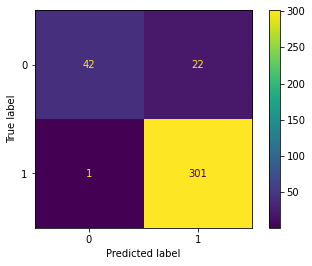

In [ ]:
# type = df.TYPE.value_counts().index.values
# type = ["ALLERGY", "COLD", "COVID", "FLU"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train_data,svc_train_grid)
                                    , display_labels=svc_grid.classes_)
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test_data,svc_pred_grid))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.96      1.00      0.98        76

    accuracy                           0.97        92
   macro avg       0.98      0.91      0.94        92
weighted avg       0.97      0.97      0.97        92



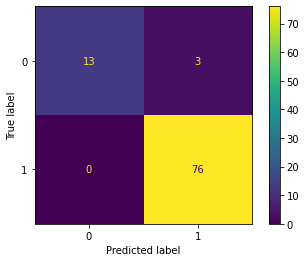

In [ ]:
# type = df.TYPE.value_counts().index.values
# type = ["ALLERGY", "COLD", "COVID", "FLU"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_data,svc_pred_grid), 
                                    display_labels=svc_grid.classes_)
cm_display.plot()
plt.show()